In [1]:
pip install MFLES --upgrade

In [2]:
pip install ConformalImpact --upgrade

  Attempting uninstall: ConformalImpact
    Found existing installation: ConformalImpact 0.0.2
    Uninstalling ConformalImpact-0.0.2:
      Successfully uninstalled ConformalImpact-0.0.2


In [3]:
pip install CausalImpact

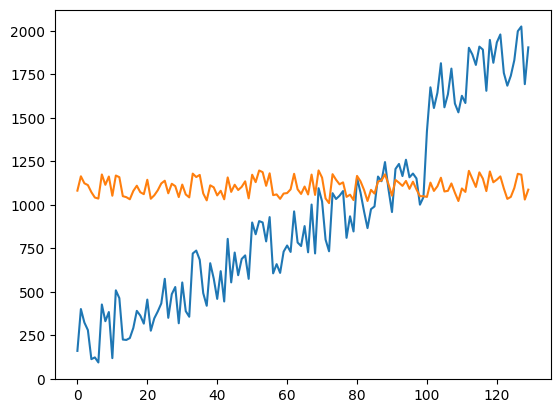

In [4]:
import numpy as np
import pandas as pd
intervention_effect = 400
np.random.seed(42)
series = np.random.random((130, 1)) * 400
x_series = series * .4 + np.random.random((130, 1)) * 50 + 1000
trend = (np.arange(1, 131)).reshape((-1, 1))
series += 10 * trend
series[-30:] = series[-30:] + intervention_effect

data = pd.DataFrame(np.column_stack([series, x_series]), columns=['y', 'x1'])

import matplotlib.pyplot as plt

plt.plot(series)
plt.plot(x_series)
plt.show()

In [5]:
from ConformalImpact.Model import CI

conformal_impact = CI(opt_size=20,
                      opt_steps=10,
                      opt_step_size=3)
impact_df = conformal_impact.fit(data,
                              n_windows=30,
                              intervention_index=100,
                              seasonal_period=None)


/usr/local/lib/python3.10/dist-packages/MFLES/Model.py:41: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def lasso_nb(X, y, alpha, tol=0.001, maxiter=10000):
/usr/local/lib/python3.10/dist-packages/MFLES/Model.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def median(y, seasonal_period):
/usr/local/lib/python3.10/dist-packages/MFLES/Model.py:180: NumbaDep

In [6]:
conformal_impact.summary()

AVG. Absolute Effect: 342.24866638379774
Cumulative Effect: 10267.459991513932


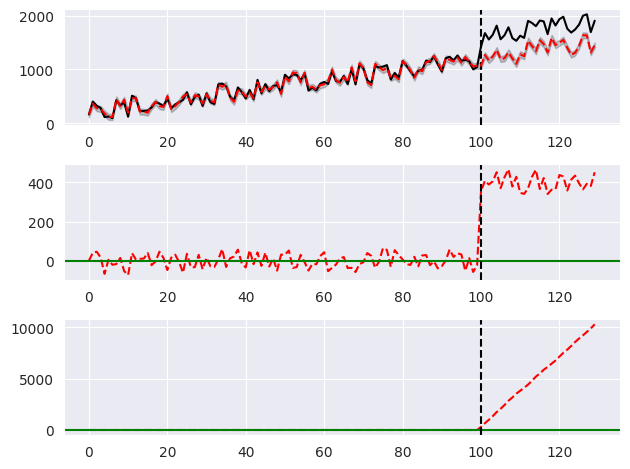

In [7]:
conformal_impact.plot()

In [8]:
from causalimpact import CausalImpact

impact = CausalImpact(data, [0, 99], [100, 130])
impact.run()
print(impact.summary())
output = impact.inferences

                               Average      Cumulative
Actual                            1757           52737
Predicted                         1170           35114
95% CI                     [979, 1361]  [29370, 40857]
                                                      
Absolute Effect                    587           17623
95% CI                      [778, 396]  [23366, 11880]
                                                      
Relative Effect                  50.2%           50.2%
95% CI                  [66.5%, 33.8%]  [66.5%, 33.8%]
                                                      
P-value                           0.0%                
Prob. of Causal Effect          100.0%                
None


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


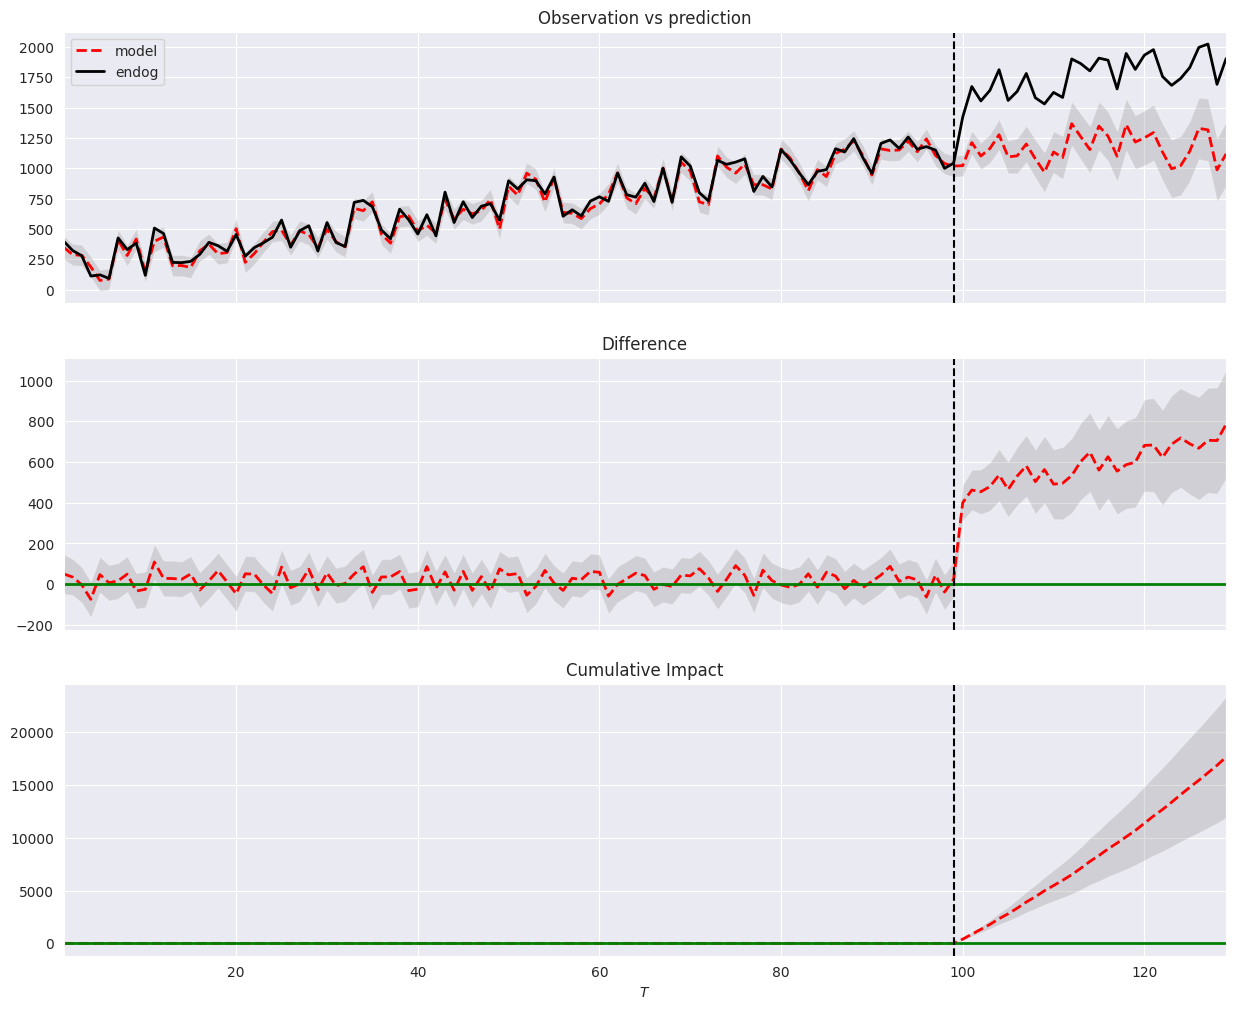

In [9]:
impact.plot()